#Tutorial 6, Example 3a

In [1]:
import os
import pylab
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# Check the version of PyTorch
print(torch.__version__)

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

2.0.1+cu118
creating the figures folder


In [2]:
# Load and prepare the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128)

100%|██████████| 9912422/9912422 [00:00<00:00, 183298259.61it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 44049343.21it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 143310775.35it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 22203413.48it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



See eg6.2.ipynb for explanation on this part

In [3]:
# Build Model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv = nn.Conv2d(1, 25, 9, padding=0)
        self.pool = nn.MaxPool2d(4, 4)
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(25 * 5 * 5, 10)

    def forward(self, x):
        conv = F.relu(self.conv(x))
        pool = self.pool(conv)
        flatten = self.flatten(pool)
        out = F.softmax(self.dense(flatten), dim=1)
        return conv, pool, out

model = MyModel()

# MyModel Explanation

`MyModel` is a simple neural network model built using PyTorch's `nn.Module`. Here's a breakdown of its components:

## Initialization (`__init__` method)

1. **Convolutional Layer (`self.conv`)**:
    - Input Channels: 1 (Assuming grayscale images)
    - Output Channels: 25 (Number of filters)
    - Kernel Size: 9x9
    - Padding: 0 (No padding)

2. **Pooling Layer (`self.pool`)**:
    - Type: MaxPooling
    - Kernel Size: 4x4
    - Stride: 4x4 (Same as kernel size, meaning no overlap)

3. **Flatten Layer (`self.flatten`)**:
    - This layer is used to flatten the 2D output from the pooling layer into a 1D tensor.

4. **Dense (Fully Connected) Layer (`self.dense`)**:
    - Input Features: 25 * 5 * 5 (Derived from the output of the pooling layer)
    - Output Features: 10 (Assuming 10 classes for classification)

## Forward Pass (`forward` method)

1. **Convolution**:
    - The input `x` is passed through the convolutional layer followed by a ReLU activation function.

2. **Pooling**:
    - The activated output from the convolutional layer is then passed through the max pooling layer.

3. **Flattening**:
    - The pooled output is flattened to prepare it for the dense layer.

4. **Dense Layer with Softmax Activation**:
    - The flattened output is passed through the dense layer.
    - The output of the dense layer is then passed through a softmax activation function to get the final class probabilities.

The model returns the outputs of the convolutional layer, pooling layer, and the final class probabilities.

In [4]:
# Choose an optimizer and loss function for training
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [10]:
# Main function: train and test the model
EPOCHS = 50
test_acc = []
print('Training...')
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    correct = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        _, _, output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()

    train_accuracy = 100. * correct / len(train_loader.dataset)

    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            _, _, output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_accuracy = 100. * correct / len(test_loader.dataset)
    test_acc.append(test_accuracy)
    print(f'Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%, Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%')

Training...
Epoch 1, Loss: 2.2470, Accuracy: 28.95%, Test Loss: 2.2283, Test Accuracy: 30.41%
Epoch 2, Loss: 2.2125, Accuracy: 31.41%, Test Loss: 2.1916, Test Accuracy: 33.93%
Epoch 3, Loss: 2.1775, Accuracy: 35.87%, Test Loss: 2.1576, Test Accuracy: 38.44%
Epoch 4, Loss: 2.1467, Accuracy: 38.46%, Test Loss: 2.1292, Test Accuracy: 39.36%
Epoch 5, Loss: 2.1218, Accuracy: 39.03%, Test Loss: 2.1065, Test Accuracy: 39.66%
Epoch 6, Loss: 2.1002, Accuracy: 39.78%, Test Loss: 2.0831, Test Accuracy: 42.61%
Epoch 7, Loss: 2.0762, Accuracy: 45.03%, Test Loss: 2.0580, Test Accuracy: 47.29%
Epoch 8, Loss: 2.0545, Accuracy: 47.10%, Test Loss: 2.0380, Test Accuracy: 48.22%
Epoch 9, Loss: 2.0373, Accuracy: 47.61%, Test Loss: 2.0226, Test Accuracy: 48.68%
Epoch 10, Loss: 2.0241, Accuracy: 47.89%, Test Loss: 2.0107, Test Accuracy: 48.79%
Epoch 11, Loss: 2.0134, Accuracy: 48.03%, Test Loss: 2.0006, Test Accuracy: 49.00%
Epoch 12, Loss: 2.0030, Accuracy: 48.13%, Test Loss: 1.9884, Test Accuracy: 49.14%
E

# Main Function Explanation

The main function provided is responsible for both training the neural network model on the training dataset and evaluating its performance on the test dataset. Here's a detailed breakdown:

## Setting Parameters

- **EPOCHS**: The number of times the entire dataset is passed through the neural network. Set to 50 in this case.

- **test_acc**: A list to store the accuracy of the model on the test dataset for each epoch.

## Training Loop

1. **Training Mode**:
    - `model.train()`: Sets the model to training mode. Essential because certain layers like dropout or batch normalization have different behaviors during training and evaluation.

2. **Batch-wise Training**:
    - The training data is loaded in batches using `train_loader`.
    - For each batch of data and its corresponding targets:
        - Clear the gradients using `optimizer.zero_grad()`.
        - Pass the data through the model to get the output.
        - Compute the loss between the predicted output and the actual target using the `criterion`.
        - Backpropagate the error using `loss.backward()`.
        - Update the model's weights using `optimizer.step()`.
        - Accumulate the loss for the epoch using `total_loss`.
        - Determine the predicted class by finding the index with the maximum value in the output tensor and accumulate the number of correct predictions.

3. **Compute Training Accuracy**:
    - The training accuracy is computed as the ratio of correct predictions to the total number of samples in the training dataset.

## Testing Loop

1. **Evaluation Mode**:
    - `model.eval()`: Sets the model to evaluation mode.

2. **No Gradient Computation**:
    - `with torch.no_grad()`: Ensures that no gradients are computed during the testing phase, which reduces memory consumption and speeds up computation.

3. **Batch-wise Testing**:
    - The test data is loaded in batches using `test_loader`.
    - For each batch of data:
        - Pass the data through the model to get the output.
        - Compute the loss between the predicted output and the actual target.
        - Accumulate the test loss for the epoch using `test_loss`.
        - Determine the predicted class by finding the index with the maximum value in the output tensor and accumulate the number of correct predictions.

4. **Compute Test Accuracy**:
    - The test accuracy is computed as the ratio of correct predictions to the total number of samples in the test dataset.

5. **Print Epoch Results**:
    - After each epoch, the average training loss, training accuracy, average test loss, and test accuracy are printed.

By the end of all epochs, the model will have been trained on the training dataset and evaluated on the test dataset for 50 times (as per the `EPOCHS` value).


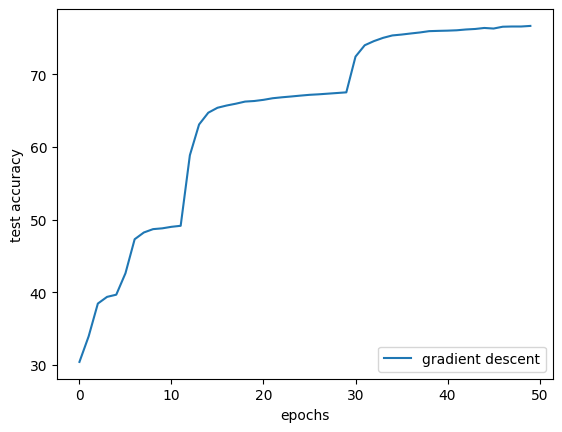

In [11]:
# Plotting test accuracy
plt.figure()
plt.plot(np.arange(EPOCHS), test_acc, label='gradient descent')
plt.xlabel('epochs')
plt.ylabel('test accuracy')
plt.legend(loc='lower right')
plt.savefig('./figures/t6q3_1.png')

(25, 1, 9, 9)


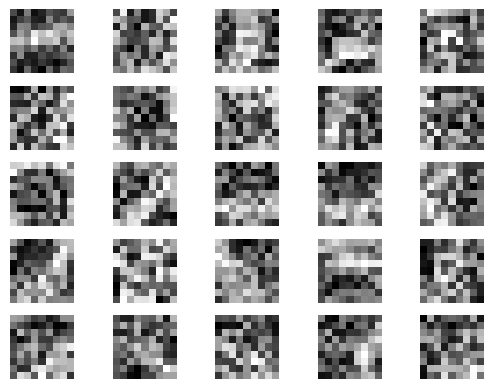

In [12]:
# Get filters learned at the conv layer
filters_conv = model.conv.weight.data.cpu().numpy()
print(filters_conv.shape)

# Displaying the filters
plt.figure()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(filters_conv[i, 0, :, :], cmap='gray')
plt.savefig('./figures/t6q3_2.png')

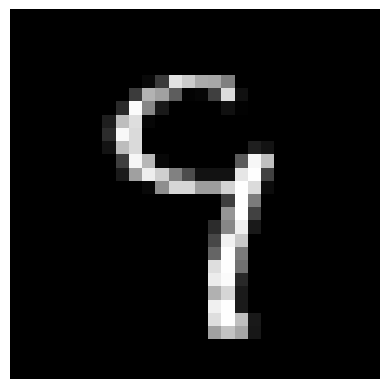

In [13]:
# Select and show a random sample
seed = 2
np.random.seed(seed)
ind = np.random.randint(0, 2000)
x, _ = test_dataset[ind]
conv, pool, _ = model(x.unsqueeze(0))

# Displaying the random sample
plt.figure()
plt.axis('off')
plt.imshow(x.squeeze().numpy(), cmap='gray')
plt.savefig('./figures/t6q3_3.png')

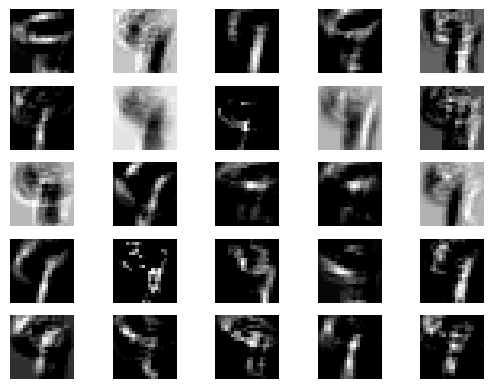

In [14]:
# Show feature maps at conv
conv = conv.data.cpu().numpy()
plt.figure()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(conv[0, i, :, :], cmap='gray')
plt.savefig('./figures/t6q3_4.png')

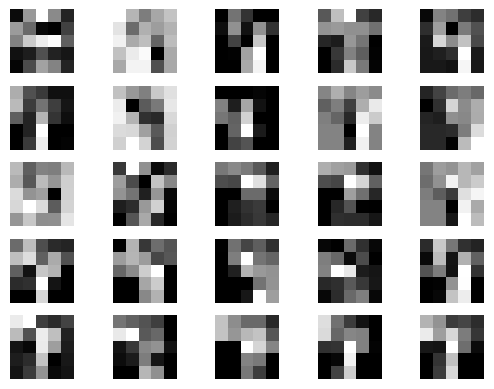

In [15]:
# Show feature maps at pooling
pool = pool.data.cpu().numpy()
plt.figure()
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.imshow(pool[0, i, :, :], cmap='gray')
plt.savefig('./figures/t6q3_5.png')

plt.show()